# MA5114 - Programming for Biology - Assignment 5
### Clodagh Murray 
## An analysis of GC content & gene length in megaviruses


In [41]:
from Bio import Entrez
from Bio import SeqIO
from Bio import SeqUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [165]:
Entrez.email = "A.N.Other@example.com"   
handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="JN258408")
Record = SeqIO.read(handle, "gb")

In [166]:
def analyse_genbank_gc(accession):
    Entrez.email = "A.N.Other@example.com"   
    handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=accession)
    Record = SeqIO.read(handle, "gb")
    
    #Make list of all coding sequnces
    CDS = []
    for feature in Record.features:
        if feature.type == "CDS":
            CDS.append(feature.location.extract(Record).seq)
            
    #Make list of the lengths of all coding sequenes
    lengths = []
    for seq in CDS:
        lengths.append(len(seq))
        
    #Define thresholds for upper and lower 10th quantile of the length distirbution
    short_threshold = np.quantile(lengths, 0.1)
    long_threshold = np.quantile(lengths, 0.9)
    
    #Output so that analyses can be distinguished
    
    print("      ")
    print("--------------------------------------------------------------------")
    print("\033[1m" +  "GC Percentage Analysis For", accession, "\033[0m")
    print("--------------------------------------------------------------------")
    print("      ")
    
    
    # Create histogram for sequnce length distributions
    fig, ax = plt.subplots(figsize =(20,6))
    ax.hist(lengths, bins=50)
    ax.vlines([short_threshold, long_threshold], 0, 400, colors="red") # add lines to indicated short and long seq threshold
    ax.set_title("Distribution of Sequence Lengths")
    ax.set_xlabel("Sequence length")
    ax.set_ylabel("No. of seqs")
    plt.show()
    
    # Output some summary statistics for coding sequence lengths
    print("*","CDS mean:", round(np.mean(lengths),2))
    print("*","CDS min:", np.min(lengths))
    print("*","CDS max:", np.max(lengths))
    
    # Make 2 new lists: One containing short coding sequences, one containing long coding sequences (characterised by defined upper and lower thresholds)
    short_seqs = []
    for seq in CDS:
        if len(seq) < short_threshold:
            short_seqs.append(seq)
    long_seqs = []
    for seq in CDS:
        if len(seq) > long_threshold:
            long_seqs.append(seq)
            
    # Make list of the GC contents for short and long groups
    short_seqs_GC = []
    for short_seq in short_seqs:
        short_seqs_GC.append(SeqUtils.GC(short_seq))
    long_seqs_GC = []
    for long_seq in long_seqs:
        long_seqs_GC.append(SeqUtils.GC(long_seq))
        
    # Boxplot comparing GC contents between short and long
    print("                   ")
    print("Short seqs are those below", round(short_threshold), "bases long")
    print("Long seqs are those below", round(long_threshold), "bases long")
    short_long = [short_seqs_GC, long_seqs_GC]
    boxplot_names  = ["Short", "Long"]
    fig, ax = plt.subplots(figsize = (13,9))
    ax.boxplot(short_long)
    ax.set_xticklabels(boxplot_names)
    ax.set_title("Boxplot of GC%")
    plt.show()
    
    # Summary statistics and statistical analysis
    print("mean GC% for short genes:", np.mean(short_seqs_GC))
    print("variance of GC% for short genes:", np.var(short_seqs_GC))
    print("---------------")
    print("mean GC% for long genes:", np.mean(long_seqs_GC))
    print("variance of GC% for long genes:", np.var(long_seqs_GC))
    print("   ")
    
    print("Statistical analysis")
    print(stats.mannwhitneyu(short_seqs_GC, long_seqs_GC))
    stat = stats.mannwhitneyu(short_seqs_GC, long_seqs_GC)
    print("P-value: ", stat.pvalue)
    print("           ")
    print("           ")
    print("           ")

In [172]:
with open("genbank_accessions.txt", 'r') as accession_nos:
    accession = accession_nos.read().split()
    print(accession)
!pwd

['JN258408', 'JF801956', 'NC_014649', 'JN036606', 'NC_014637', 'U00096']
/home/clodagh/Masters/Programming for Biology


      
--------------------------------------------------------------------
GC Percentage Analysis For JN258408 
--------------------------------------------------------------------
      


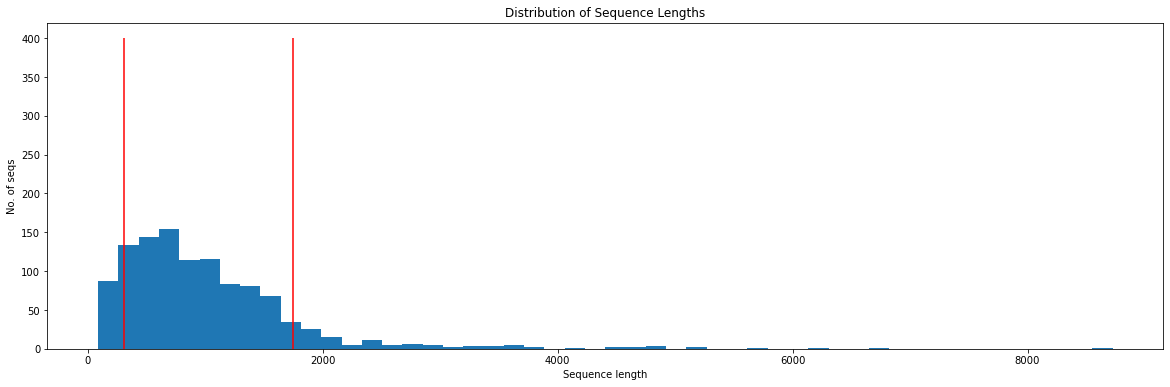

* CDS mean: 1015.06
* CDS min: 87
* CDS max: 8724
                   
Short seqs are those below 309 bases long
Long seqs are those below 1747 bases long


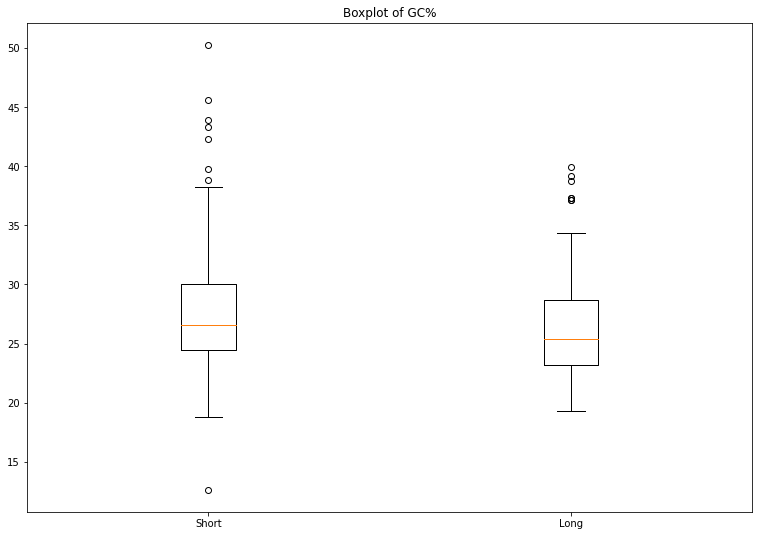

mean GC% for short genes: 27.91609645161271
variance of GC% for short genes: 35.45074531329958
---------------
mean GC% for long genes: 26.556667490047865
variance of GC% for long genes: 20.979460220704716
   
Statistical analysis
MannwhitneyuResult(statistic=5258.0, pvalue=0.018317654407491)
P-value:  0.018317654407491
           
           
           
      
--------------------------------------------------------------------
GC Percentage Analysis For JF801956 
--------------------------------------------------------------------
      


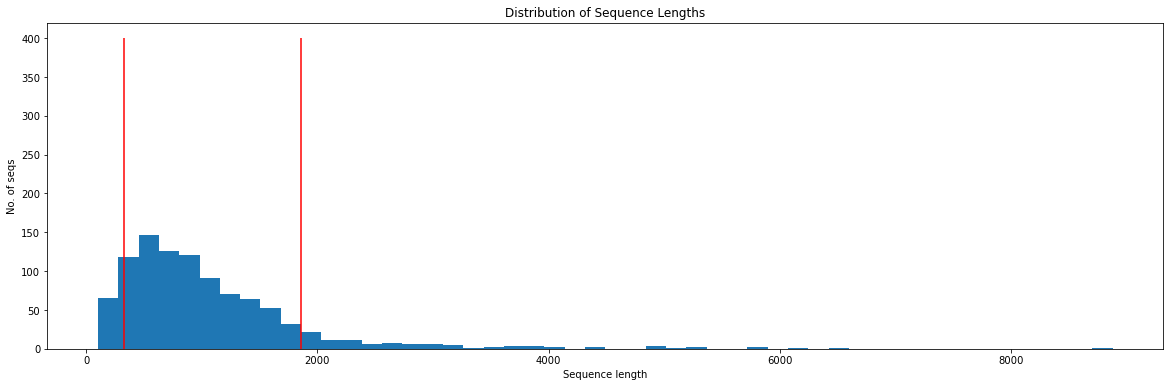

* CDS mean: 1055.94
* CDS min: 102
* CDS max: 8880
                   
Short seqs are those below 326 bases long
Long seqs are those below 1858 bases long


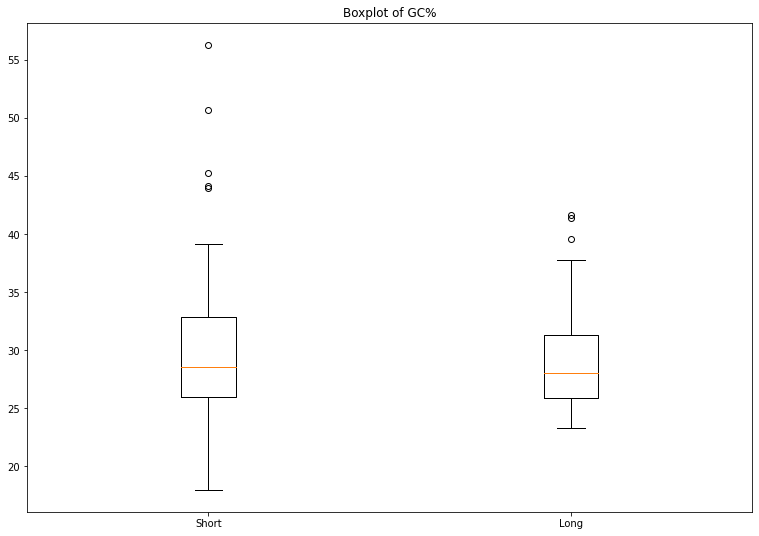

mean GC% for short genes: 29.900874129259808
variance of GC% for short genes: 38.69988239723407
---------------
mean GC% for long genes: 29.035643244748673
variance of GC% for long genes: 16.800222810478488
   
Statistical analysis
MannwhitneyuResult(statistic=4642.5, pvalue=0.26150432975725124)
P-value:  0.26150432975725124
           
           
           
      
--------------------------------------------------------------------
GC Percentage Analysis For NC_014649 
--------------------------------------------------------------------
      


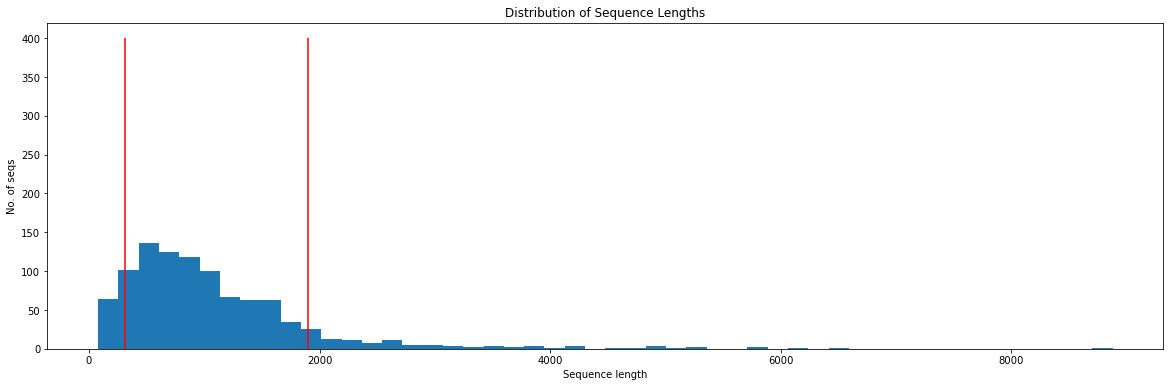

* CDS mean: 1073.03
* CDS min: 78
* CDS max: 8880
                   
Short seqs are those below 315 bases long
Long seqs are those below 1900 bases long


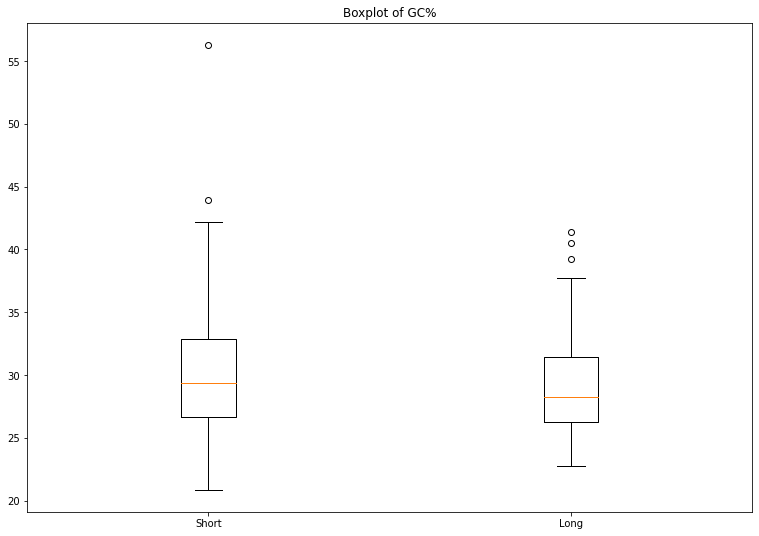

mean GC% for short genes: 30.013303177900656
variance of GC% for short genes: 28.49603590544332
---------------
mean GC% for long genes: 29.238067278189117
variance of GC% for long genes: 16.985314779389437
   
Statistical analysis
MannwhitneyuResult(statistic=4212.5, pvalue=0.15362580006314858)
P-value:  0.15362580006314858
           
           
           
      
--------------------------------------------------------------------
GC Percentage Analysis For JN036606 
--------------------------------------------------------------------
      


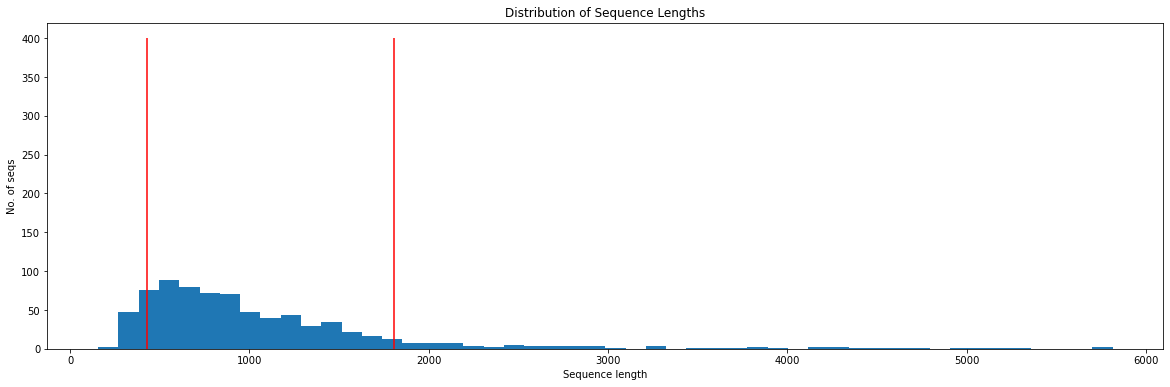

* CDS mean: 1068.47
* CDS min: 156
* CDS max: 5814
                   
Short seqs are those below 429 bases long
Long seqs are those below 1804 bases long


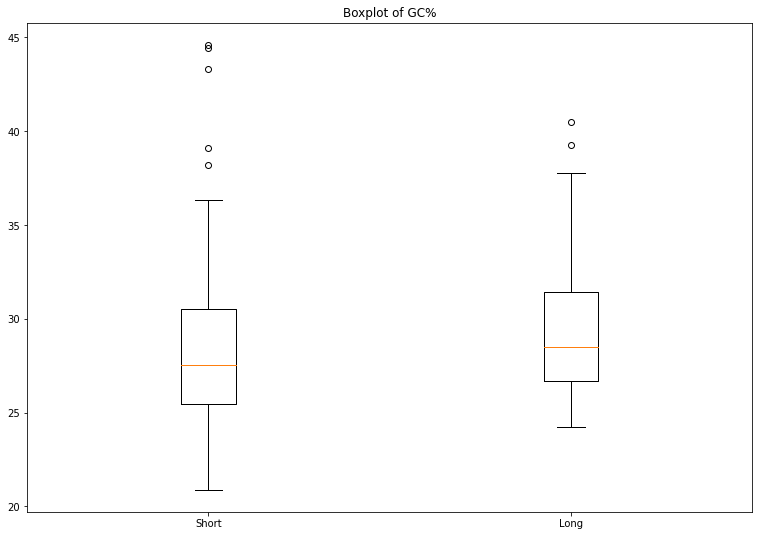

mean GC% for short genes: 28.614330640102946
variance of GC% for short genes: 24.28268536973423
---------------
mean GC% for long genes: 29.535297447068135
variance of GC% for long genes: 13.558245756253593
   
Statistical analysis
MannwhitneyuResult(statistic=2195.0, pvalue=0.010238959751496341)
P-value:  0.010238959751496341
           
           
           
      
--------------------------------------------------------------------
GC Percentage Analysis For NC_014637 
--------------------------------------------------------------------
      


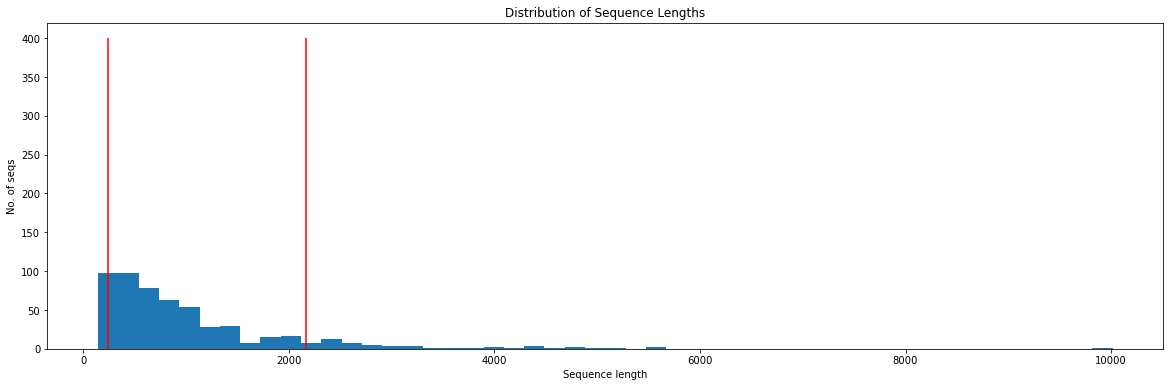

* CDS mean: 1023.02
* CDS min: 144
* CDS max: 10014
                   
Short seqs are those below 240 bases long
Long seqs are those below 2167 bases long


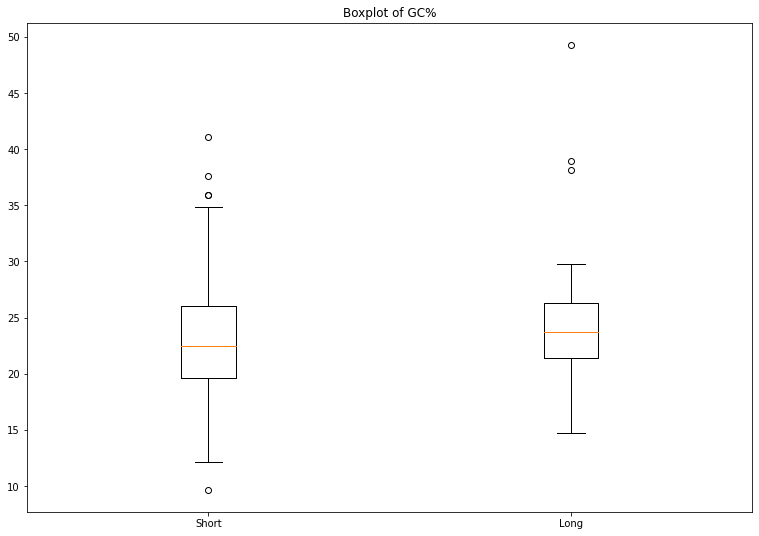

mean GC% for short genes: 23.478204145308695
variance of GC% for short genes: 39.69144274787973
---------------
mean GC% for long genes: 24.627532210077668
variance of GC% for long genes: 29.872090083380773
   
Statistical analysis
MannwhitneyuResult(statistic=1223.0, pvalue=0.05649913003857927)
P-value:  0.05649913003857927
           
           
           
      
--------------------------------------------------------------------
GC Percentage Analysis For U00096 
--------------------------------------------------------------------
      


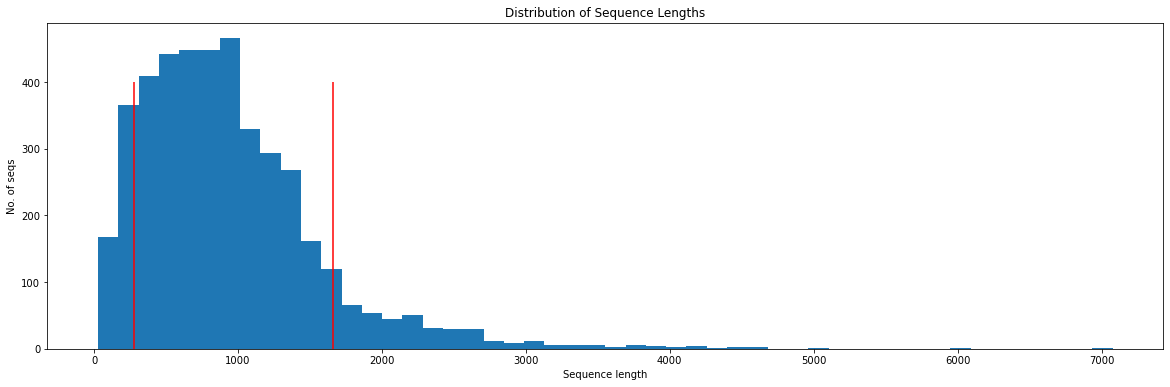

* CDS mean: 934.3
* CDS min: 27
* CDS max: 7077
                   
Short seqs are those below 276 bases long
Long seqs are those below 1659 bases long


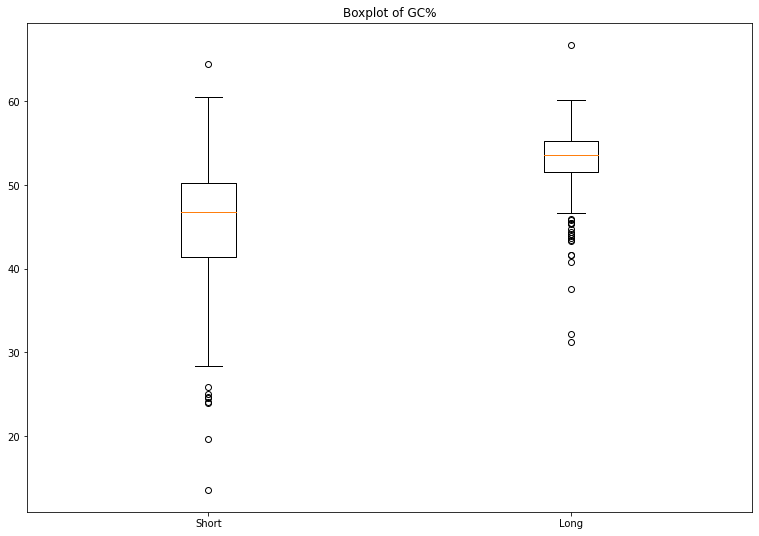

mean GC% for short genes: 45.278034762679084
variance of GC% for short genes: 53.16842618519097
---------------
mean GC% for long genes: 53.08692811229205
variance of GC% for long genes: 12.266287646979157
   
Statistical analysis
MannwhitneyuResult(statistic=25981.5, pvalue=1.0573749442480219e-74)
P-value:  1.0573749442480219e-74
           
           
           


In [173]:
for number in accession:
    analyse_genbank_gc(number)

### Megavirus Genome Analysis Output

#### JN258408 
Megavirus chilensis genome is a linear, double-stranded molecule of DNA and it is classified as the second largest viral genome deciphered so far.

This analysis shows us the distribution of coding sequence lengths in the genome, around an average of 1015.06 base pairs in length. When sequence lengths are classified as short and long based on 10th level quantiles, the mean GC percentage for both groups are very similar (around 26%) with short sequences exhibiting a larger variance. This difference in variance is enough to account for a statistically significant result which says that GC content is different between groups.

As viruses are well known parasitic organisms that in many cases are prevalent in certain host populations, a high GC content in shorter sequences may be indicative of this organism's high evolutionary fitness.


#### JF801956 
Acanthamoeba castellanii mamavirus strain Hal-V is a member of the Group I family Mimiviridae.

This anlysis returns an average coding sequence length of 1055.94. GC content between short and long sequences are very similar - around 29%, again with higher variance in short sequences. There is no statistically significant differences in GC content according to the mann whitney u test. 


#### NC_014649
Acanthamoeba polyphaga mimivirus is the only species of the virus genus Mimiviridae. Amoeba serve as their natural host.

This analysis returns the average coding sequence length of 1073. GC contents between short and long sequences are similar -  around 30%. There is no statistically significant difference in GC content between groups. 


#### JN036606 
Acanthamoeba polyphaga mimivirus isolate M4

This is an isolate from the same species of Mimivirus mentioned above, however this time, there is a statistically significant difference in GC content between short and long coding sequences in the genome which may be explained by the large amount of variance in GC content in short sequences.


#### NC_014637
Cafeteria roenbergensis virus BV-PW1
GC contents between short and long sequences are similar -  around 23%. There is no statistically significant difference in GC content between groups. 

#### U00096
Escherichia coli str. K-12 substr. MG1655

This is a gram negative bacteria -  its genome is much bigger than that of megaviruses and therefore there is a bigger distribution of sequence lengths. 

The mean GC% for short sequences is 45% and for long sequences it is 53%. There is a statistically significant difference between short and long sequences with longer sequences having a higher GC content which is what we expect in general.

